<a href="https://colab.research.google.com/github/prabuelangovan/prabuelangovan/blob/main/Diabetes_Prediction_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
df=pd.read_csv('diabetes.csv')

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [10]:
def EDA(name, df) :
    print("== ============================================================")
    print("== EDA : ", name)
    print("== ============================================================")
    
    print(">>> all column info")
    print(df.columns)
    
    print(">>> inlude object column info")
    print(df.select_dtypes(include=object).columns)
    for col in df.select_dtypes(include=object).columns :
        print("-- ------------------------------------------------------------")
        print(col, "-", df[col].nunique(), " : ", df[col].unique())
        print(df[col].value_counts())
        print("null check : ", df[col].isnull().sum())
        
    print(">>> exclude object column info")
    print(df.select_dtypes(exclude=object).columns)
    for col in df.select_dtypes(exclude=object).columns :
        print("-- ------------------------------------------------------------")
        print(col, "-", df[col].unique()[:10])
        print(df[col].describe())
        print("null check : ", df[col].isnull().sum())
    
    print("== ============================================================")
    print(df.isnull().sum())
    print(df.info())
    print(df.describe())
    print("== ============================================================\n\n")

In [11]:
EDA("Diabetes Data",df)

== ============================================================
== EDA :  Diabetes Data
== ============================================================
>>> all column info
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')
>>> inlude object column info
Index([], dtype='object')
>>> exclude object column info
Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')
-- ------------------------------------------------------------
Pregnancies - [ 6  1  8  0  5  3 10  2  4  7]
count    768.000000
mean       3.845052
std        3.369578
min        0.000000
25%        1.000000
50%        3.000000
75%        6.000000
max       17.000000
Name: Pregnancies, dtype: float64
null check :  0
-- ------------------------------------------------------------
Glucose - [148  85 183  89 137 116  78 115 197 125]
count    768.00

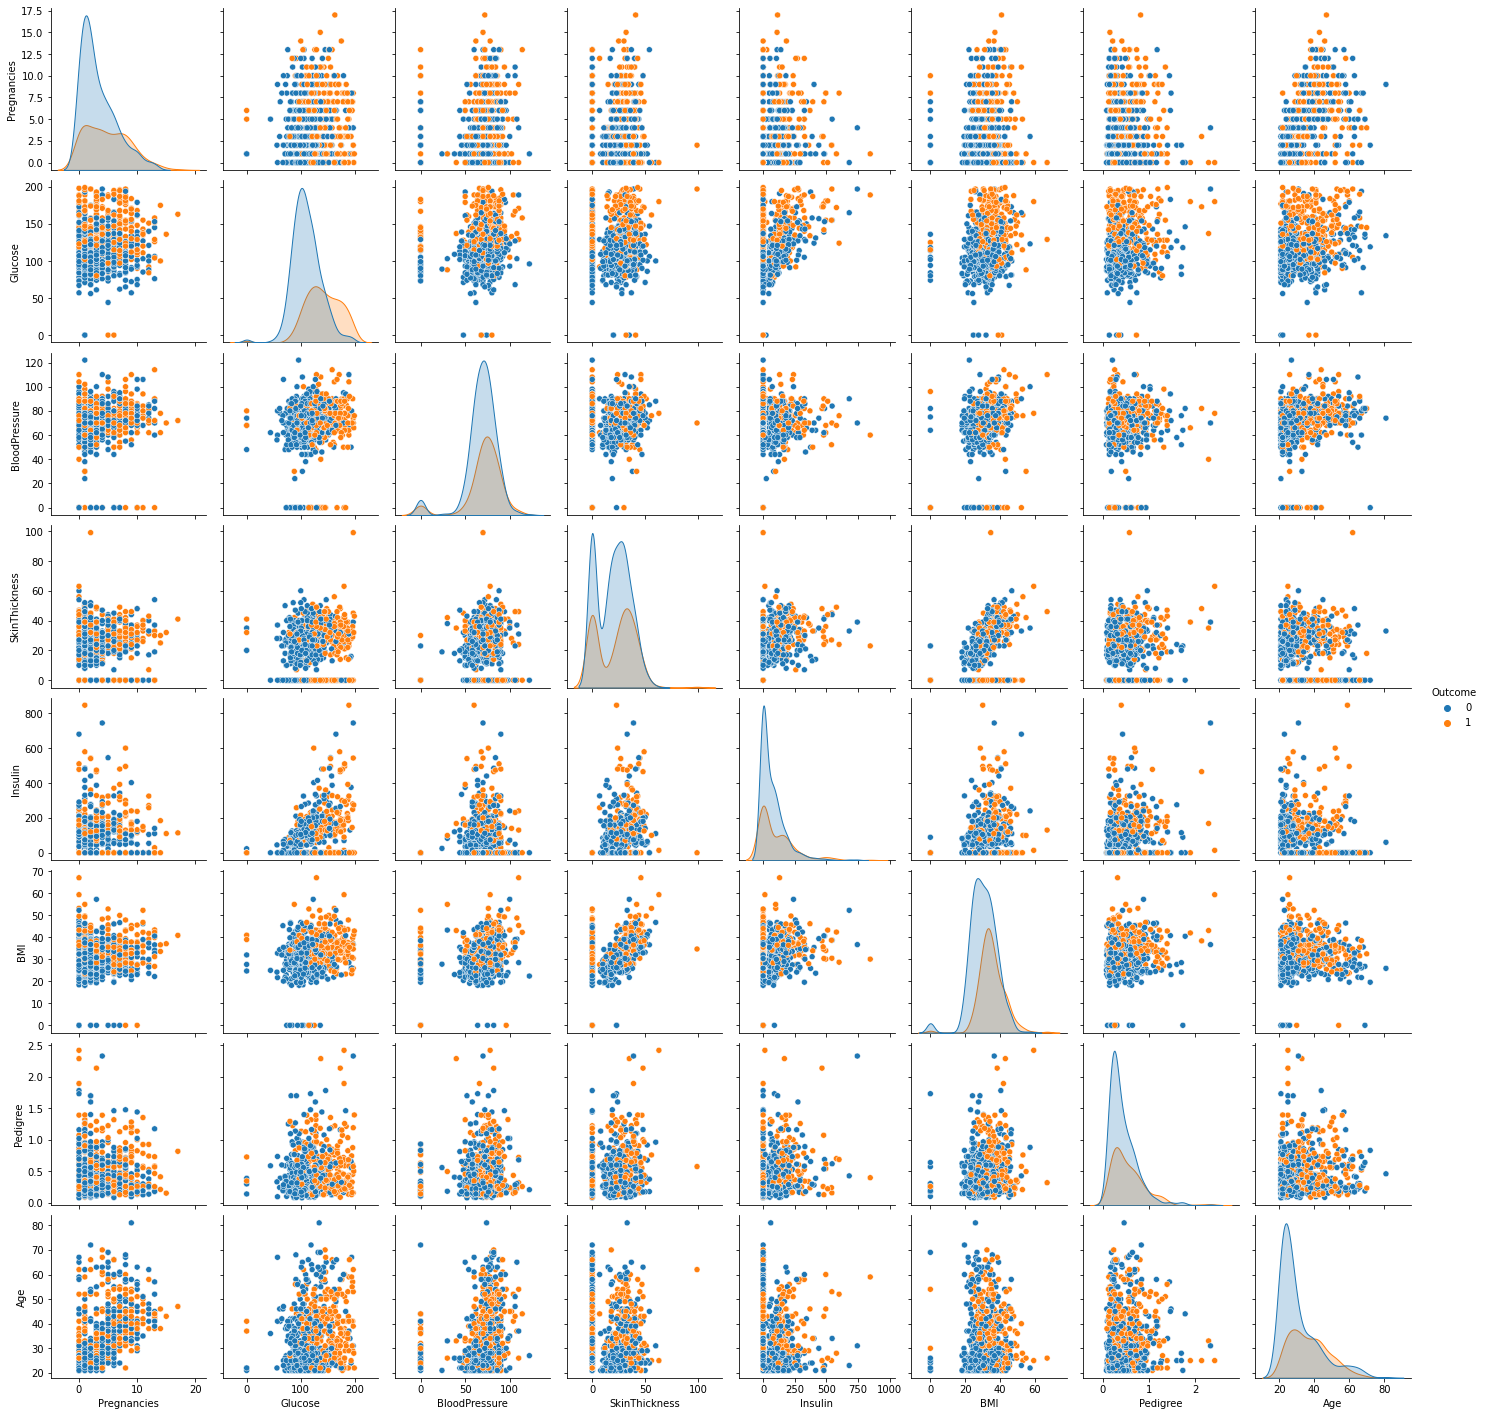

In [12]:
sns.pairplot(df,hue='Outcome')

In [13]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
Pedigree,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


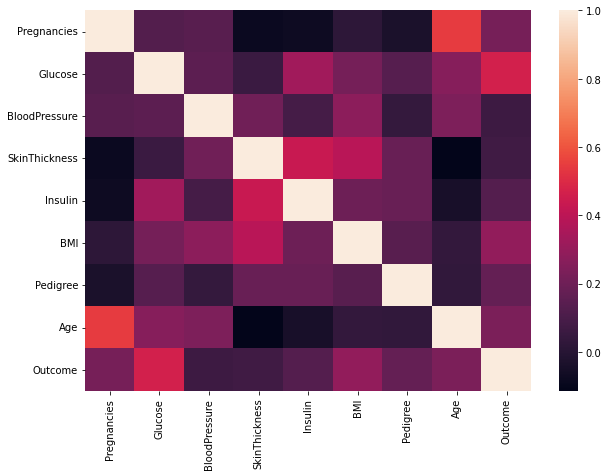

In [15]:
plt.figure(figsize = (10,7))
sns.heatmap(df.corr())

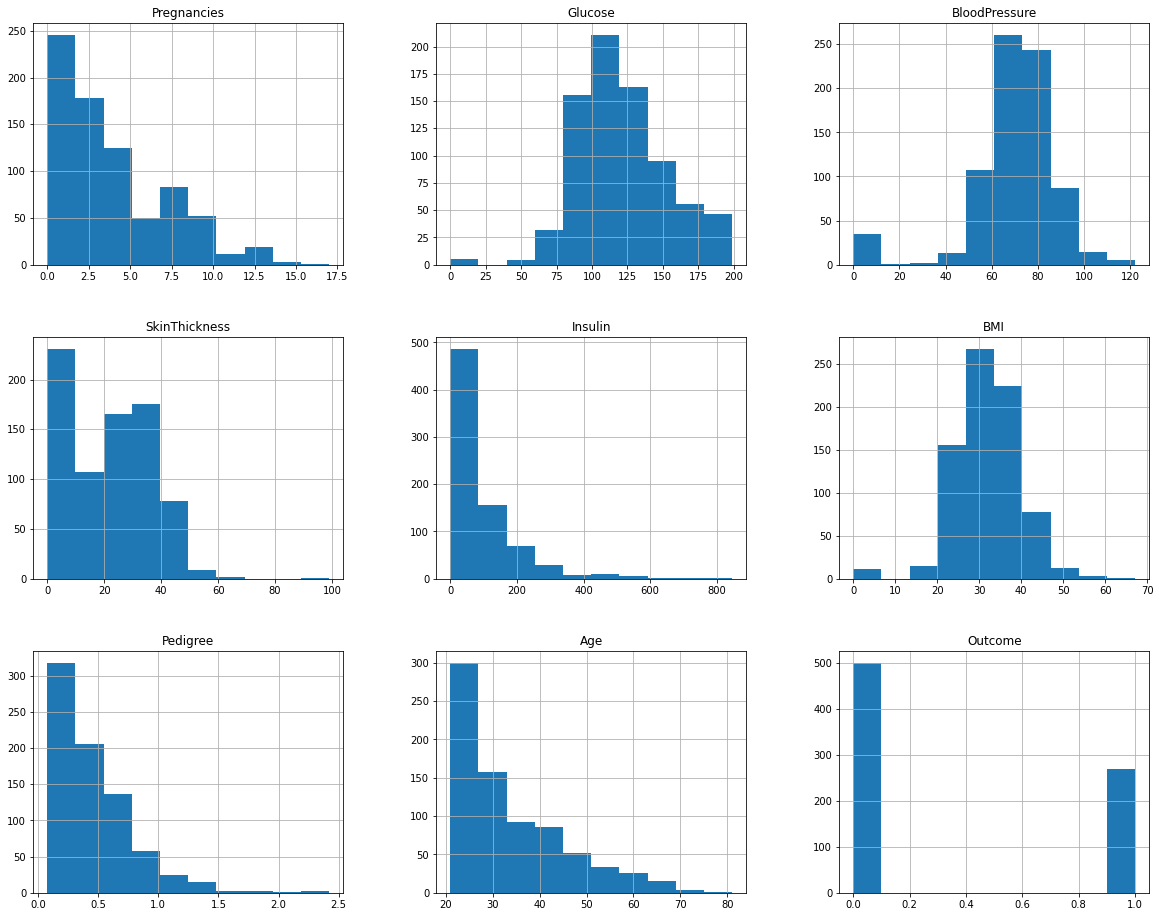

In [16]:
hist = df.hist(figsize=(20,16))

In [25]:
target_feature = 'Outcome'
x = df.drop(target_feature, axis=1)
y = df[target_feature]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [26]:
smote = SMOTE(random_state=10)
x_train_resize, y_train_resize = smote.fit_resample(x_train, y_train)

Text(0, 0.5, 'Proportion')

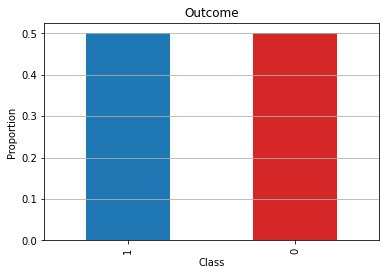

In [27]:
y_train_resize.value_counts(normalize=True).plot.bar(color=['tab:blue', 'tab:red'])
plt.grid(axis='y')
plt.title(target_feature)
plt.xlabel('Class')
plt.ylabel('Proportion')

In [30]:
classifier= KNeighborsClassifier(n_neighbors=1, metric='minkowski', p=2 )  
classifier.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [33]:
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[78 22]
 [22 32]]


              precision    recall  f1-score   support

           0       0.78      0.78      0.78       100
           1       0.59      0.59      0.59        54

    accuracy                           0.71       154
   macro avg       0.69      0.69      0.69       154
weighted avg       0.71      0.71      0.71       154



In [34]:
error_rate = []
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

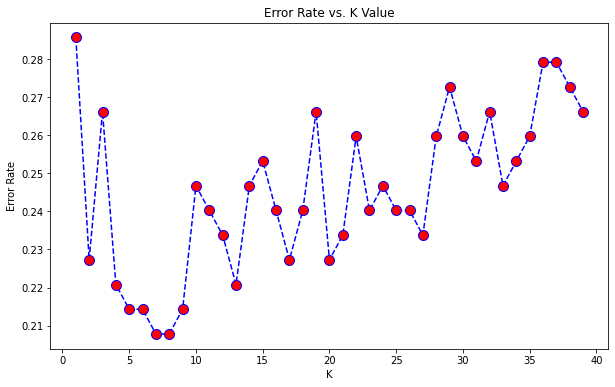

In [35]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [36]:
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[87 13]
 [19 35]]


              precision    recall  f1-score   support

           0       0.82      0.87      0.84       100
           1       0.73      0.65      0.69        54

    accuracy                           0.79       154
   macro avg       0.77      0.76      0.77       154
weighted avg       0.79      0.79      0.79       154

